# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [20]:
#建立模型
model = Sequential()

#輸入層
model.add(Dense(units=256,
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'))
#隱藏層
model.add(Dense(units=256,
                kernel_initializer='normal',
                activation='relu'))
model.add(Dense(units=256,
                kernel_initializer='normal',
                activation='relu'))

#輸出層
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

In [21]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [22]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [11]:
#無隱藏層
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 68us/step - loss: 0.2699 - accuracy: 0.9226 - val_loss: 0.1318 - val_accuracy: 0.9621
Epoch 2/10
48000/48000 [==============================] - 3s 64us/step - loss: 0.1074 - accuracy: 0.9686 - val_loss: 0.1027 - val_accuracy: 0.9691
Epoch 3/10
48000/48000 [==============================] - 3s 65us/step - loss: 0.0709 - accuracy: 0.9784 - val_loss: 0.0932 - val_accuracy: 0.9729
Epoch 4/10
48000/48000 [==============================] - 3s 67us/step - loss: 0.0513 - accuracy: 0.9840 - val_loss: 0.0807 - val_accuracy: 0.9762
Epoch 5/10
48000/48000 [==============================] - 3s 65us/step - loss: 0.0368 - accuracy: 0.9887 - val_loss: 0.0793 - val_accuracy: 0.9764
Epoch 6/10
48000/48000 [==============================] - 3s 63us/step - loss: 0.0255 - accuracy: 0.9921 - val_loss: 0.0760 - val_accuracy: 0.9791
Epoch 7/10
48000/48000 [==============================] - 3s 67us/st

In [23]:
#2層隱藏層
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 110us/step - loss: 0.2392 - accuracy: 0.9270 - val_loss: 0.1563 - val_accuracy: 0.9509
Epoch 2/10
48000/48000 [==============================] - 5s 99us/step - loss: 0.0993 - accuracy: 0.9700 - val_loss: 0.1173 - val_accuracy: 0.9637
Epoch 3/10
48000/48000 [==============================] - 5s 101us/step - loss: 0.0694 - accuracy: 0.9782 - val_loss: 0.0908 - val_accuracy: 0.9733
Epoch 4/10
48000/48000 [==============================] - 5s 96us/step - loss: 0.0509 - accuracy: 0.9848 - val_loss: 0.1147 - val_accuracy: 0.9697
Epoch 5/10
48000/48000 [==============================] - 5s 95us/step - loss: 0.0423 - accuracy: 0.9866 - val_loss: 0.1216 - val_accuracy: 0.9656
Epoch 6/10
48000/48000 [==============================] - 5s 98us/step - loss: 0.0378 - accuracy: 0.9885 - val_loss: 0.1056 - val_accuracy: 0.9754
Epoch 7/10
48000/48000 [==============================] - 5s 95us/

# 以圖形顯示訓練過程

In [24]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

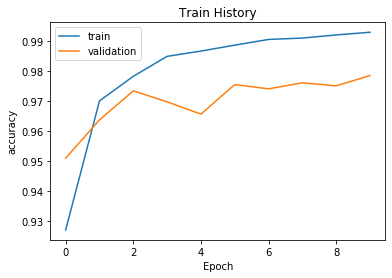

In [25]:
show_train_history(train_history,'accuracy','val_accuracy')

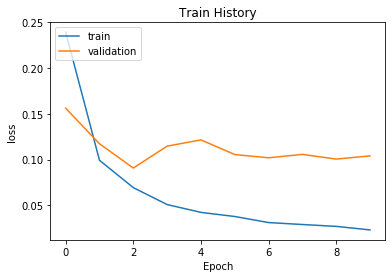

In [26]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

>無隱藏層模型準確率 :  
>>10000/10000 [==============================] - 0s 19us/step  
accuracy= 0.9800999760627747

In [27]:
#2層隱藏層模型準確率 :
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 22us/step

accuracy= 0.9786999821662903
